#### This script borrows heavily from: https://www.kaggle.com/whizzkid/crop-images-using-bounding-box
#### Thank You!

In [1]:
import numpy as np # linear algebra
import xml.etree.ElementTree as ET # for parsing XML
import matplotlib.pyplot as plt # to show images
from PIL import Image # to read images
from tqdm import tqdm
import os
import glob
import cv2

In [2]:
# Constanta
ORIG_IMAGES = '../input/all-dogs/all-dogs/'
ANNOTATIONS = '../input/Annotation/'
OUTPUT_IMAGES_DIR = '/data/data1/datasets/kaggle/generative_dog_images/input/processed_images/orig_images_bboxed'

In [3]:
def get_orig_image_filenames():
    ''' Return a list of full original filenames '''
    orig_filenames = []
    for fn in os.listdir(ORIG_IMAGES):
        full_fn = os.path.join(ORIG_IMAGES, fn)
        orig_filenames.append(full_fn)
    return orig_filenames

In [4]:
# Process images and breeds
all_images=os.listdir(ORIG_IMAGES)
print(f"Total images : {len(all_images)}")

breeds = glob.glob(ANNOTATIONS+'*')
annotation=[]
for b in breeds:
    annotation+=glob.glob(b+"/*")
print(f"Total annotation : {len(annotation)}")

breed_map={}
for annot in annotation:
    breed=annot.split("/")[-2]
    index=breed.split("-")[0]
    breed_map.setdefault(index,breed)
    
print(f"Total Breeds : {len(breed_map)}")

Total images : 20579
Total annotation : 20580
Total Breeds : 120


In [5]:
def bounding_box(image):
    bpath=ANNOTATIONS+str(breed_map[image.split("_")[0]])+"/"+str(image.split(".")[0])
    tree = ET.parse(bpath)
    root = tree.getroot()
    objects = root.findall('object')
    for o in objects:
        bndbox = o.find('bndbox') # reading bound box
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
    return (xmin,ymin,xmax,ymax)

In [6]:
# Process and show one image cropped using bbox
index = 102
resize_32 = (32,32)
resize_64 = (64,64)
image_full_path = ORIG_IMAGES + all_images[index]
im=Image.open(os.path.join(image_full_path))
bbox=bounding_box(all_images[index])
im_bboxed = im.crop(bbox)

In [7]:
np.array(im).shape, np.array(im_bboxed).shape, 

((375, 500, 3), (252, 100, 3))

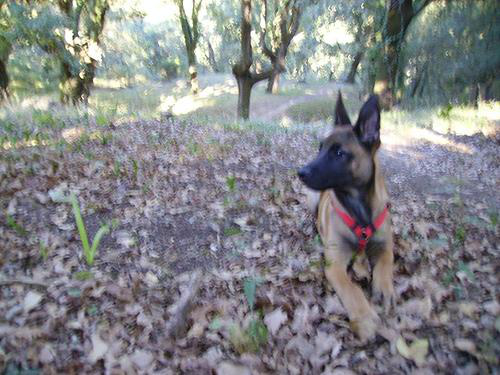

In [8]:

im

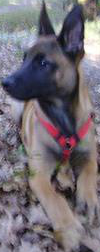

In [9]:
im_bboxed

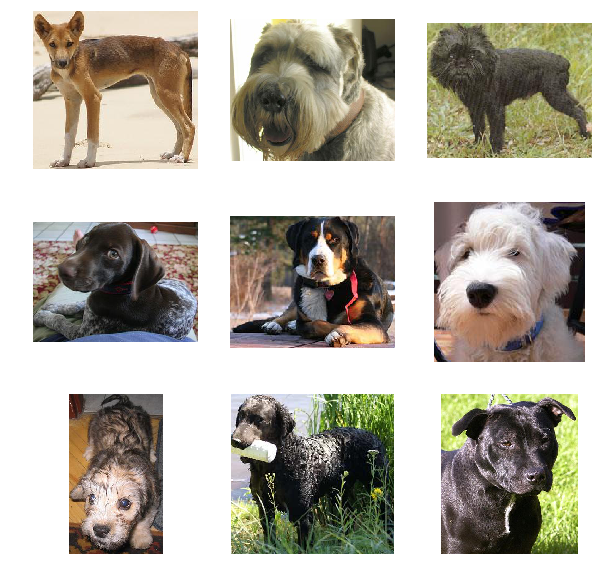

In [10]:
# Now show a bunch
plt.figure(figsize=(10,10))
for i,image in enumerate(all_images):
    bbox=bounding_box(image)
    im=Image.open(os.path.join(ORIG_IMAGES,image))
    im=im.crop(bbox)
    
    plt.subplot(3,3,i+1)
    plt.axis("off")
    plt.imshow(im)    
    if(i==8):
        break

In [11]:
orig_fn = get_orig_image_filenames()

In [12]:
len(orig_fn)

20579

In [13]:
# Read each image and write out its bboxed and resized images
resize_to = (64, 64)
for full_fn in tqdm(orig_fn):
# for full_fn in orig_fn[120:140]:
    in_fn = os.path.basename(full_fn)
    out_full_fn = os.path.join(OUTPUT_IMAGES_DIR, in_fn)
    # print(f'Processing {full_fn}')
    # print(f'Processing {out_full_fn}')

    # Read image
    img = cv2.imread(full_fn)
    # Flip BGR to RGB
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get the bbox
    bbox=bounding_box(in_fn)
    (xmin, ymin, xmax, ymax) = bbox
    # Clip image to bbox
    img_bboxed = img[ymin:ymax, xmin:xmax]
    img_resized = cv2.resize(img_bboxed, resize_to)
    
    # Write them out
    cv2.imwrite(out_full_fn, img_resized)
    '''
    # Plot each one of them to test
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(cv2.cvtColor(img_bboxed, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.show()
    '''
    


100%|██████████| 20579/20579 [01:21<00:00, 251.32it/s]
